In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [5]:
df = pd.read_csv("perfil_eleitor_com_deficiencia_2020_Sjc.csv", sep=";", encoding="latin-1")

In [58]:
#Aqui podemos ver um exemplo da tabela utilizada para fazer a análise dos dados.
#A base de dados encontra-se nesse repositório ou no seguinte link: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1

In [160]:
df.sample(10)

,NR_ZONA,NR_SECAO,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,DS_TIPO_DEFICIENCIA
996,412,5,FEMININO,VIUVO,70 a 74 anos,ENSINO FUNDAMENTAL INCOMPLETO,DEFICIENCIA DE LOCOMOCAO
3076,412,226,MASCULINO,SOLTEIRO,40 a 44 anos,ENSINO MEDIO COMPLETO,DEFICIENCIA DE LOCOMOCAO
2089,412,264,MASCULINO,SOLTEIRO,30 a 34 anos,ENSINO MEDIO COMPLETO,OUTROS
97,411,200,FEMININO,CASADO,45 a 49 anos,ENSINO MEDIO COMPLETO,DEFICIENCIA DE LOCOMOCAO
246,411,318,MASCULINO,VIUVO,70 a 74 anos,ENSINO FUNDAMENTAL INCOMPLETO,DEFICIENCIA DE LOCOMOCAO
1114,411,221,FEMININO,CASADO,30 a 34 anos,ENSINO MEDIO COMPLETO,OUTROS
3806,412,6,FEMININO,VIUVO,70 a 74 anos,ANALFABETO,OUTROS
325,411,174,FEMININO,CASADO,75 a 79 anos,ENSINO MEDIO COMPLETO,DEFICIENCIA VISUAL
1205,411,130,MASCULINO,DIVORCIADO,45 a 49 anos,ENSINO MEDIO COMPLETO,DEFICIENCIA DE LOCOMOCAO
4019,411,169,MASCULINO,CASADO,75 a 79 anos,ENSINO FUNDAMENTAL COMPLETO,DEFICIENCIA DE LOCOMOCAO


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NR_ZONA               5784 non-null   int64 
 1   NR_SECAO              5784 non-null   int64 
 2   DS_GENERO             5784 non-null   object
 3   DS_ESTADO_CIVIL       5784 non-null   object
 4   DS_FAIXA_ETARIA       5784 non-null   object
 5   DS_GRAU_ESCOLARIDADE  5784 non-null   object
 6   DS_TIPO_DEFICIENCIA   5784 non-null   object
 7   DEFICIENCIA_GENERO    5784 non-null   object
dtypes: int64(2), object(6)
memory usage: 361.6+ KB


In [163]:
df.describe()

,NR_ZONA,NR_SECAO
count,5784.000000,5784.000000
mean,331.794087,234.408541
std,115.375273,179.645155
min,127.000000,1.000000
25%,282.000000,107.000000
50%,411.000000,196.000000
75%,412.000000,321.000000
max,412.000000,739.000000


In [10]:
df.shape

(5784, 7)

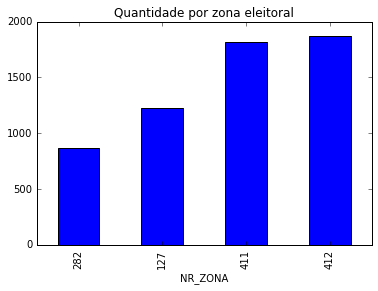

In [7]:
# Quantidade de eleitores por zona eleitoral
df.groupby('NR_ZONA').size().sort_values().plot(kind='bar', title='Quantidade por zona eleitoral')

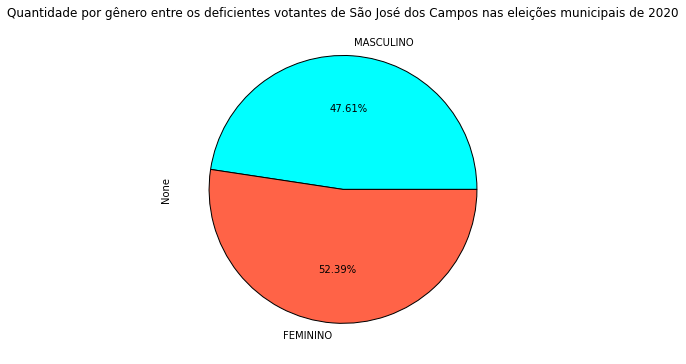

In [55]:
# Quantidade de eleitores por gênero
colors = ['aqua', 'tomato']
df.groupby('DS_GENERO').size().sort_values().plot(kind='pie', autopct='%.2f%%', colors=colors,  figsize=(8, 6), title='Quantidade por gênero entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020')

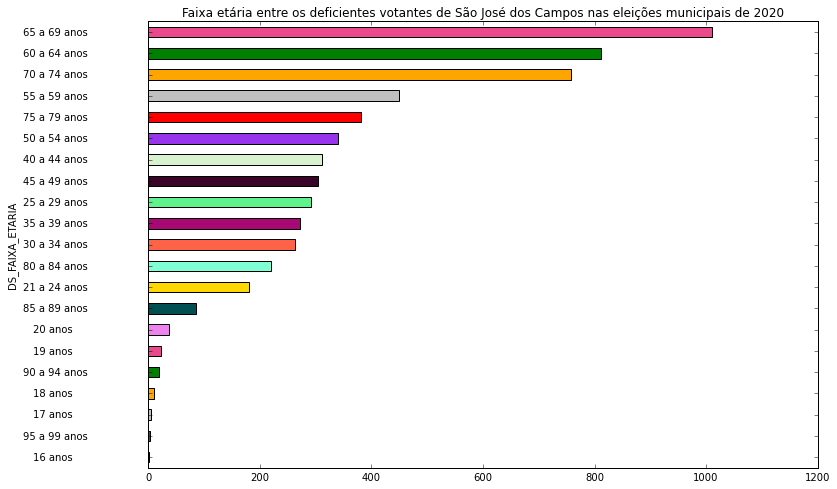

In [57]:
# Faixa etária dos eleitores
colors2 = ['#9834eb','red', 'silver', 'orange', 'green', '#eb498c', 'violet', '#014F50', 'gold', 'aquamarine', 'tomato', '#A80874', '#5EF38C', '#3A0328', '#D8F2CF']
df.groupby('DS_FAIXA_ETARIA').size().sort_values().plot(kind='barh', stacked=True, title='Faixa etária entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020', color=colors2, figsize=(12, 8))

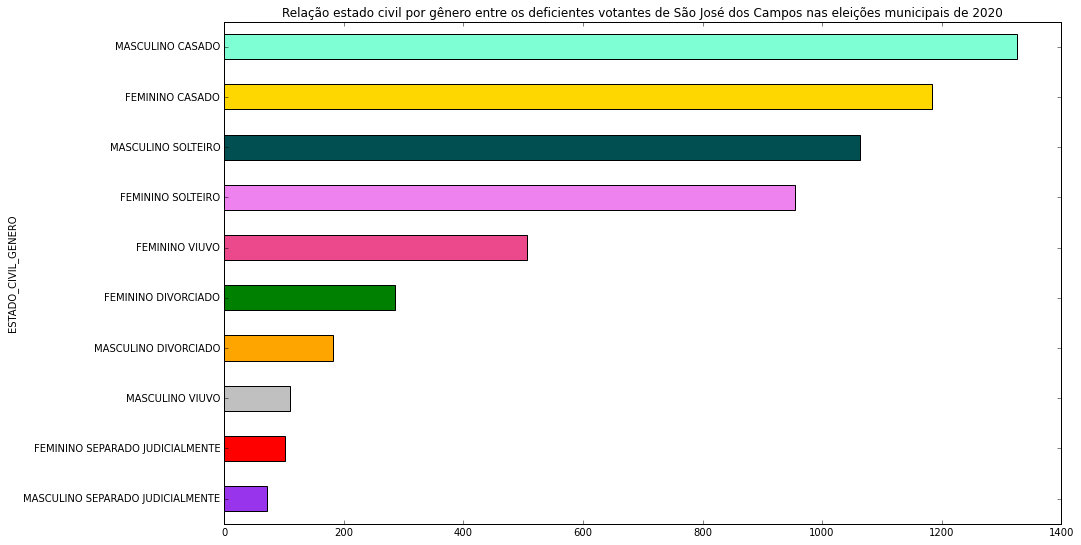

In [52]:
df['ESTADO_CIVIL_GENERO'] = df['DS_GENERO']+' '+df['DS_ESTADO_CIVIL']
df.groupby('ESTADO_CIVIL_GENERO').size().sort_values().plot(kind='barh', color=colors2,  figsize=(15, 9), title='Relação estado civil por gênero entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020')

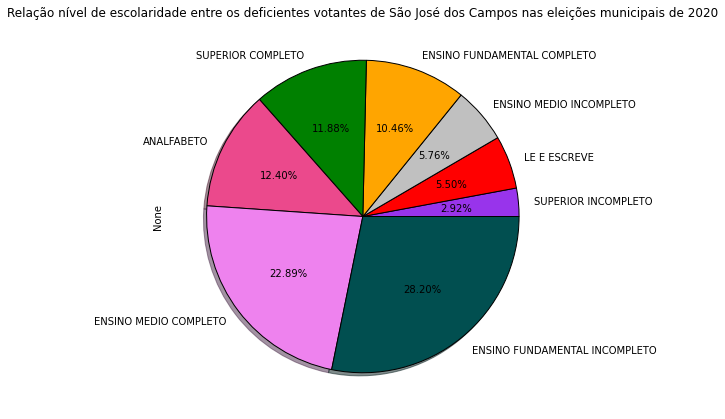

In [51]:
# Nível de escolaridade dos eleitores
# Podemos concluir que 46% dos eleitores com algum tipo de deficiencia na nossa cidade não possuem o ensino fundamental completo
df.groupby('DS_GRAU_ESCOLARIDADE').size().sort_values().plot(kind='pie', autopct = "%.2f%%",  shadow='true', title='Relação nível de escolaridade entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020', colors=colors2, figsize=(9, 7))

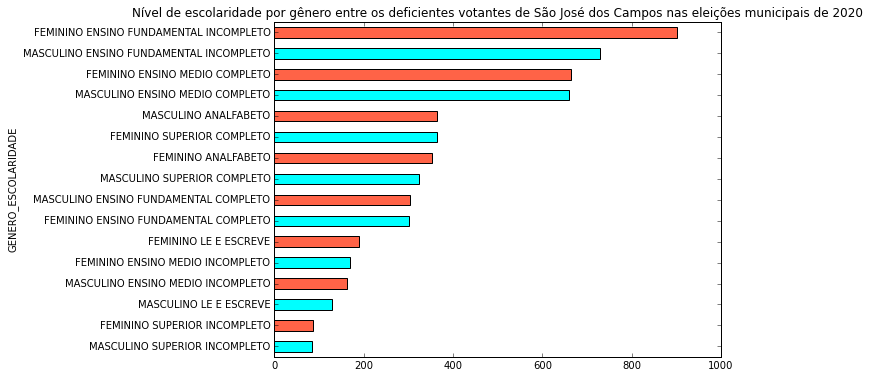

In [50]:
df['GENERO_ESCOLARIDADE'] = df['DS_GENERO']+' ' + df['DS_GRAU_ESCOLARIDADE']
df.groupby('GENERO_ESCOLARIDADE').size().sort_values().plot(kind='barh', stacked=True, title='Nível de escolaridade por gênero entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020', color=colors, figsize=(8, 6))

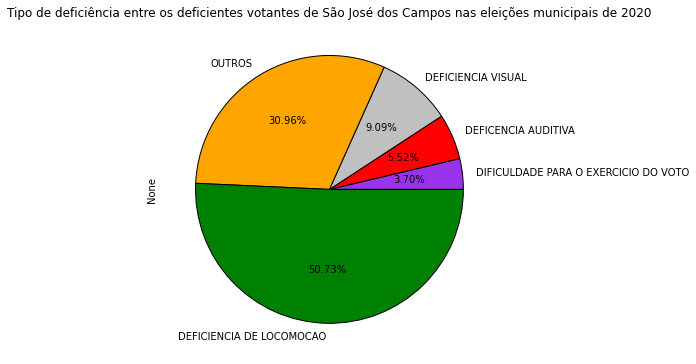

In [49]:
df.groupby('DS_TIPO_DEFICIENCIA').size().sort_values().plot(kind='pie', autopct = "%.2f%%", stacked=True, title='Tipo de deficiência entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020', colors=colors2, figsize=(10, 6))

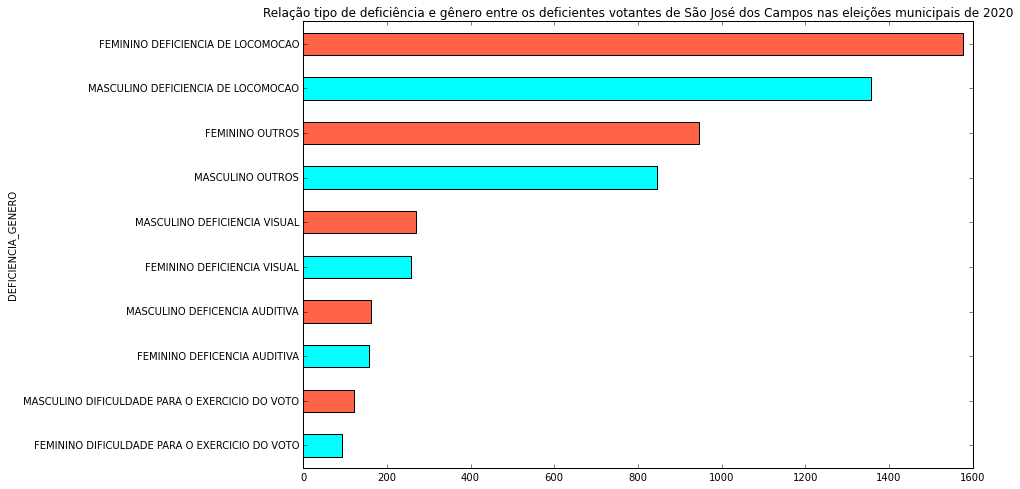

In [48]:
df['DEFICIENCIA_GENERO'] = df['DS_GENERO']+' '+df['DS_TIPO_DEFICIENCIA']
df.groupby('DEFICIENCIA_GENERO').size().sort_values().plot(kind='barh', stacked=True, title='Relação tipo de deficiência e gênero entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020', color=colors, figsize=(12, 8))

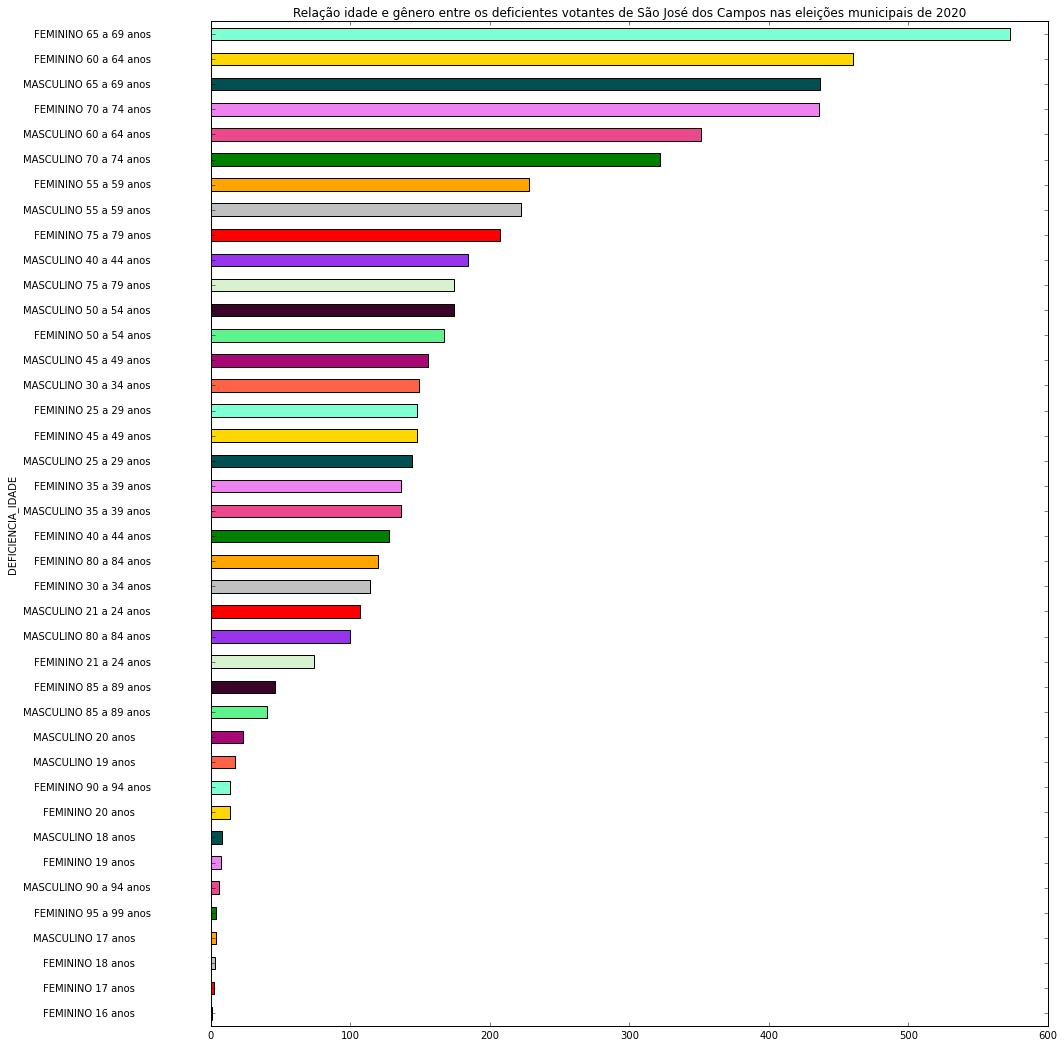

In [47]:
df['DEFICIENCIA_IDADE'] = df['DS_GENERO']+' '+df['DS_FAIXA_ETARIA']
df.groupby('DEFICIENCIA_IDADE').size().sort_values().plot(kind='barh', stacked=True, title='Relação idade e gênero entre os deficientes votantes de São José dos Campos nas eleições municipais de 2020', color=colors2, figsize=(15, 18))